# **PLACES TO VISIT IN DELHI**

**PROJECT BY:** HARSH KALRA

**Importing libraries**

In [1]:
import requests as rq
import pandas as pd
import numpy as np
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

/bin/bash: conda: command not found
/bin/bash: conda: command not found


**Foursquare Credentials**

In [2]:
ID='**************************************'
SECRET='************************************************'
Version='20180604'
Limit=120

**Getting Coordinates**


This project aims to find the places to visit in Delhi, India






In [3]:
address='Delhi, India'
geolocator=Nominatim(user_agent='foursquare_agent')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print(latitude,longitude)

28.6517178 77.2219388


**Data Gathering**

The data regarding places of visit in Delhi is acquired from the Foursquare website by sending the request.

In [4]:
searching='Places to visit'
radius=3000
url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(ID,SECRET,Version,latitude,longitude,radius,Limit)
results=rq.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '6018028fb05314441fd420b2'}, 'response': {'venues': [{'id': '4c17720230d30f472c7836a9', 'name': 'Chawri Bazaar | चावड़ी बाजार', 'location': {'address': 'Chawri Bazar, Chandni Chowk', 'lat': 28.649770989776663, 'lng': 77.22736358642578, 'labeledLatLngs': [{'label': 'display', 'lat': 28.649770989776663, 'lng': 77.22736358642578}], 'distance': 572, 'postalCode': '110006', 'cc': 'IN', 'neighborhood': 'Central Delhi', 'city': 'New Delhi', 'state': 'Delhi', 'country': 'India', 'formattedAddress': ['Chawri Bazar, Chandni Chowk', 'New Delhi 110006', 'Delhi', 'India']}, 'categories': [{'id': '4bf58dd8d48988d112951735', 'name': 'Hardware Store', 'pluralName': 'Hardware Stores', 'shortName': 'Hardware', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/hardware_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612186255', 'hasPerk': False}, {'id': '53b2b7f5498e396ed85b7220', 'name': 'sufiahandicraft', 'location': {'lat': 28.6533476263477

## **Data Preprocessing and Wrangling**

In [5]:
venues=results['response']['venues']
df=json_normalize(venues)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4c17720230d30f472c7836a9,Chawri Bazaar | चावड़ी बाजार,"[{'id': '4bf58dd8d48988d112951735', 'name': 'H...",v-1612186255,False,"Chawri Bazar, Chandni Chowk",28.649771,77.227364,"[{'label': 'display', 'lat': 28.64977098977666...",572,110006,IN,Central Delhi,New Delhi,Delhi,India,"[Chawri Bazar, Chandni Chowk, New Delhi 110006...",NaN
1,53b2b7f5498e396ed85b7220,sufiahandicraft,"[{'id': '4bf58dd8d48988d116951735', 'name': 'A...",v-1612186255,False,NaN,28.653348,77.222825,"[{'label': 'display', 'lat': 28.65334762634776...",201,NaN,IN,NaN,NaN,NaN,India,[India],NaN
2,5280a63211d26b82c4ba65c7,Spice Market,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",v-1612186255,False,NaN,28.657287,77.222595,"[{'label': 'display', 'lat': 28.65728706392764...",623,NaN,IN,NaN,NaN,NaN,India,[India],NaN
3,4c16685f7fd00f47bf2efab6,New Delhi Railway Station (NDLS),"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",v-1612186255,False,Paharganj-Ajmeri Gate,28.642028,77.219625,"[{'label': 'display', 'lat': 28.64202821789463...",1102,110001,IN,Central Delhi,New Delhi,Delhi,India,"[Paharganj-Ajmeri Gate, New Delhi 110001, Delh...",NaN
4,501c273be4b0e3507bd52252,Khan omelet corner,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",v-1612186255,False,Fateh puri,28.654721,77.221952,"[{'label': 'display', 'lat': 28.65472075072693...",334,NaN,IN,NaN,Delhi,Delhi,India,"[Fateh puri (Fateh puri), Delhi, Delhi, India]",Fateh puri


### **Data Filtering**

In [6]:
filter=['name','categories']+[col for col in df.columns if col.startswith('location')]+['id']
df_filter=df.loc[:,filter]
def category(row):
    try:
        category_list=row['categories']
    except:
        category_list=row['venue.categories']
    if len(category_list)==0:
        return None
    else:
        return category_list[0]['name']
df_filter['categories']=df_filter.apply(category,axis=1)
df_filter.columns=[column.split('.')[-1] for column in df_filter.columns]
df_names=df_filter['name']
df_filter

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id
0,Chawri Bazaar | चावड़ी बाजार,Hardware Store,"Chawri Bazar, Chandni Chowk",28.649771,77.227364,"[{'label': 'display', 'lat': 28.64977098977666...",572,110006,IN,Central Delhi,New Delhi,Delhi,India,"[Chawri Bazar, Chandni Chowk, New Delhi 110006...",NaN,4c17720230d30f472c7836a9
1,sufiahandicraft,Antique Shop,NaN,28.653348,77.222825,"[{'label': 'display', 'lat': 28.65334762634776...",201,NaN,IN,NaN,NaN,NaN,India,[India],NaN,53b2b7f5498e396ed85b7220
2,Spice Market,Food & Drink Shop,NaN,28.657287,77.222595,"[{'label': 'display', 'lat': 28.65728706392764...",623,NaN,IN,NaN,NaN,NaN,India,[India],NaN,5280a63211d26b82c4ba65c7
3,New Delhi Railway Station (NDLS),Train Station,Paharganj-Ajmeri Gate,28.642028,77.219625,"[{'label': 'display', 'lat': 28.64202821789463...",1102,110001,IN,Central Delhi,New Delhi,Delhi,India,"[Paharganj-Ajmeri Gate, New Delhi 110001, Delh...",NaN,4c16685f7fd00f47bf2efab6
4,Khan omelet corner,BBQ Joint,Fateh puri,28.654721,77.221952,"[{'label': 'display', 'lat': 28.65472075072693...",334,NaN,IN,NaN,Delhi,Delhi,India,"[Fateh puri (Fateh puri), Delhi, Delhi, India]",Fateh puri,501c273be4b0e3507bd52252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Old Kheer Shop,Indian Restaurant,NaN,28.650521,77.225710,"[{'label': 'display', 'lat': 28.6505209543672,...",391,NaN,IN,NaN,NaN,NaN,India,[India],NaN,53f5eea7498ee716052854f8
116,ashok chat,Fast Food Restaurant,near chawri metro station,28.649351,77.227001,"[{'label': 'display', 'lat': 28.64935062438132...",560,NaN,IN,NaN,NaN,Delhi,India,"[near chawri metro station, Delhi, India]",NaN,4d3068fe96fe6ea846d91444
117,Meghraj & Sons,Snack Place,NaN,28.656643,77.223566,"[{'label': 'display', 'lat': 28.65664342714284...",570,NaN,IN,NaN,NaN,NaN,India,[India],NaN,52be69e2498ec7810a0f4e5f
118,Chainaram,Snack Place,Fathepuri,28.656618,77.223476,"[{'label': 'display', 'lat': 28.65661805874002...",565,110006,IN,NaN,Delhi,Delhi,India,"[Fathepuri, Delhi 110006, Delhi, India]",NaN,4edcb2b061af8a14b90509e3


### **Checking for null values**

In [7]:
df_filter.isnull().sum()

name                  0
categories           13
address              65
lat                   0
lng                   0
labeledLatLngs        0
distance              0
postalCode           84
cc                    0
neighborhood        115
city                 68
state                67
country               0
formattedAddress      0
crossStreet          95
id                    0
dtype: int64

### **Data Cleaning**

Dropping unneccesary columns

In [8]:
df_filter.drop(columns={'name','cc','country','categories','labeledLatLngs','formattedAddress','address','postalCode','city','crossStreet','neighborhood','postalCode','state','id'},inplace=True)
df_filter.head()


,lat,lng,distance
0,28.649771,77.227364,572
1,28.653348,77.222825,201
2,28.657287,77.222595,623
3,28.642028,77.219625,1102
4,28.654721,77.221952,334


In [9]:
df_filter.isnull().sum()

lat         0
lng         0
distance    0
dtype: int64

### Visualizing Heatmap to ensure cleaned data

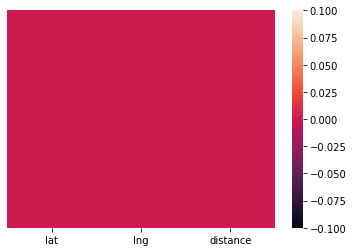

In [10]:
import seaborn as sns
sns.heatmap(df_filter.isnull(),yticklabels=False)

In [11]:
df_filter

,lat,lng,distance
0,28.649771,77.227364,572
1,28.653348,77.222825,201
2,28.657287,77.222595,623
3,28.642028,77.219625,1102
4,28.654721,77.221952,334
...,...,...,...
115,28.650521,77.225710,391
116,28.649351,77.227001,560
117,28.656643,77.223566,570
118,28.656618,77.223476,565


## **Data Preprocessing and Standardization**

In [12]:
from sklearn.preprocessing import StandardScaler
Clus_dataset=StandardScaler().fit_transform(df_filter)
Clus_dataset

array([[-0.89430589,  0.82766011, -0.02699867],
       [ 0.09846669, -0.59050519, -2.64000052],
       [ 1.19194251, -0.66222275,  0.33220104],
       [-3.04347913, -1.59029971,  3.70586111],
       [ 0.47960696, -0.86322896, -1.70326401],
       [-0.39864045,  1.33709235,  0.79704773],
       [ 0.8041573 , -2.24165123,  0.39558923],
       [-0.05964538, -0.49040792, -2.88651012],
       [ 0.69222467, -1.87270271, -0.36506899],
       [ 0.0427074 , -0.59305568, -2.78790628],
       [ 0.59024938,  1.01261755,  0.86747905],
       [-1.04065729,  0.57960098, -0.32985333],
       [-0.08984054, -0.28180218, -2.5695692 ],
       [-0.3824611 , -1.44085968, -2.79494941],
       [-0.13096705, -0.41861342, -2.88651012],
       [-0.13119979, -1.23726448, -3.02737276],
       [-1.60793952, -0.4888457 , -0.42141404],
       [-1.52577834, -0.54321079, -0.67496678],
       [-1.05807027,  0.62445139, -0.21716323],
       [-0.10350169,  1.3326973 ,  0.83930652],
       [-0.10183626,  1.33550929,  0.846

## **Applying K-Means Clustering**

In [13]:
from sklearn.cluster import KMeans
k=4
kmeans=KMeans(n_clusters=k, random_state=0).fit(Clus_dataset)

**Getting the labels for each row generated**

In [14]:
kmeans.labels_

array([0, 1, 3, 2, 1, 0, 2, 1, 2, 1, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 1, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 2, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 2, 2, 0, 0, 3, 3, 3, 0, 3, 0, 3, 1, 0, 2, 0, 0, 3, 3,
       2, 3, 3, 0, 3, 1, 0, 3, 3, 3], dtype=int32)

**Concatenating datasets with their respected labels.**

In [15]:
labels=kmeans.labels_
df_filter['Labels']=labels
df_filter.head()

,lat,lng,distance,Labels
0,28.649771,77.227364,572,0
1,28.653348,77.222825,201,1
2,28.657287,77.222595,623,3
3,28.642028,77.219625,1102,2
4,28.654721,77.221952,334,1


### **Color Codes**

In [16]:
y=0
ColorCode=[]
for x in df_filter['Labels']:
    if x==0:
        ColorCode.append('Red')
    elif x==1:
        ColorCode.append('Yellow')
    elif x==2:
        ColorCode.append('Blue')
    elif x==3:
        ColorCode.append('Green')


## **Data Visualization**

### Visualizing each cluster

In [17]:
%matplotlib inline
dlmap=folium.Map(location=[df_filter['lat'].mean(), df_filter['lng'].mean()], zoom_start=14)
i=0
Delhi=folium.map.FeatureGroup()
for lat, lon in zip(df_filter['lat'], df_filter['lng']):
  Delhi.add_child(folium.CircleMarker([lat, lon],radius=5,color=ColorCode[i],fill=True,fill_color=ColorCode[i],fill_opacity=0.7))
  i=i+1
dlmap.add_child(Delhi)
dlmap


### **Cluster 1 Data**

In [18]:
cluster1=df_filter.loc[df_filter['Labels']==0,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster1

,lng,lat
0,77.227364,28.649771
5,77.228994,28.651557
11,77.226570,28.649244
16,77.223150,28.647200
17,77.222976,28.647496
18,77.226713,28.649181
19,77.228980,28.652620
20,77.228989,28.652626
21,77.228551,28.653508
22,77.223941,28.646014


### **Cluster 2 Data**

In [19]:
cluster2=df_filter.loc[df_filter['Labels']==1,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster2


,lng,lat
1,77.222825,28.653348
4,77.221952,28.654721
7,77.223145,28.652778
9,77.222816,28.653147
12,77.223813,28.652669
13,77.220103,28.651615
14,77.223375,28.652521
15,77.220755,28.652520
37,77.222257,28.648617
41,77.222570,28.649300


### **Cluster 3 Data**

In [20]:
cluster3=df_filter.loc[df_filter['Labels']==2,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster3


,lng,lat
3,77.219625,28.642028
6,77.217540,28.655890
8,77.218721,28.655487
24,77.218013,28.654232
30,77.217256,28.647903
36,77.216828,28.652464
77,77.217475,28.647776
81,77.217766,28.648699
92,77.217529,28.652967
93,77.217953,28.648090


### **Cluster 4 Data**

In [21]:
cluster4=df_filter.loc[df_filter['Labels']==3,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster4

,lng,lat
2,77.222595,28.657287
10,77.227956,28.655119
25,77.227909,28.654408
42,77.225675,28.655784
43,77.226271,28.654864
44,77.227417,28.655844
45,77.225174,28.656773
47,77.225295,28.655505
48,77.223231,28.657847
49,77.225637,28.656959


**Counting places to visit in each cluster**

In [22]:
print('Total venue in:\n')
print("Cluster 1:",cluster1.shape[0])
print("Cluster 2:",cluster2.shape[0])
print("Cluster 3:",cluster3.shape[0])
print("Cluster 4:",cluster4.shape[0])

Total venue in:

Cluster 1: 46
Cluster 2: 13
Cluster 3: 12
Cluster 4: 49


**Hence, cluster 1 have most number of places of visit in Delhi and therefore will be our targetted cluster.**

In [23]:
C1=cluster1['lat'].mean()
C2=cluster1['lng'].mean()
print("The center of the area has coordinates:",C1,C2)

The center of the area has coordinates: 28.650103161376045 77.22700131090905


# **Visualizing Target Cluster**

In [24]:
index=cluster1.index

In [25]:
%matplotlib inline
shop=folium.Map(location=[C1, C2], zoom_start=16)
i=0
mark=folium.map.FeatureGroup()
for lat, lon in zip(cluster4['lat'], cluster4['lng']):
    mark.add_child(folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7))
    i=i+1
for lat, lng, J in zip(cluster4['lat'], cluster4['lng'], index):
    folium.Marker([lat,lng],popup=df_names[J]).add_to(shop)
shop.add_child(mark)
shop